In [2]:
from warnings import filterwarnings 
filterwarnings('ignore')

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize,MinMaxScaler,OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [4]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [235]:
df = data.copy()

In [236]:
df.set_index('CustomerID',inplace=True)

In [9]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [11]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [13]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
df[df.duplicated()]

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,


In [20]:
df.Gender.value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

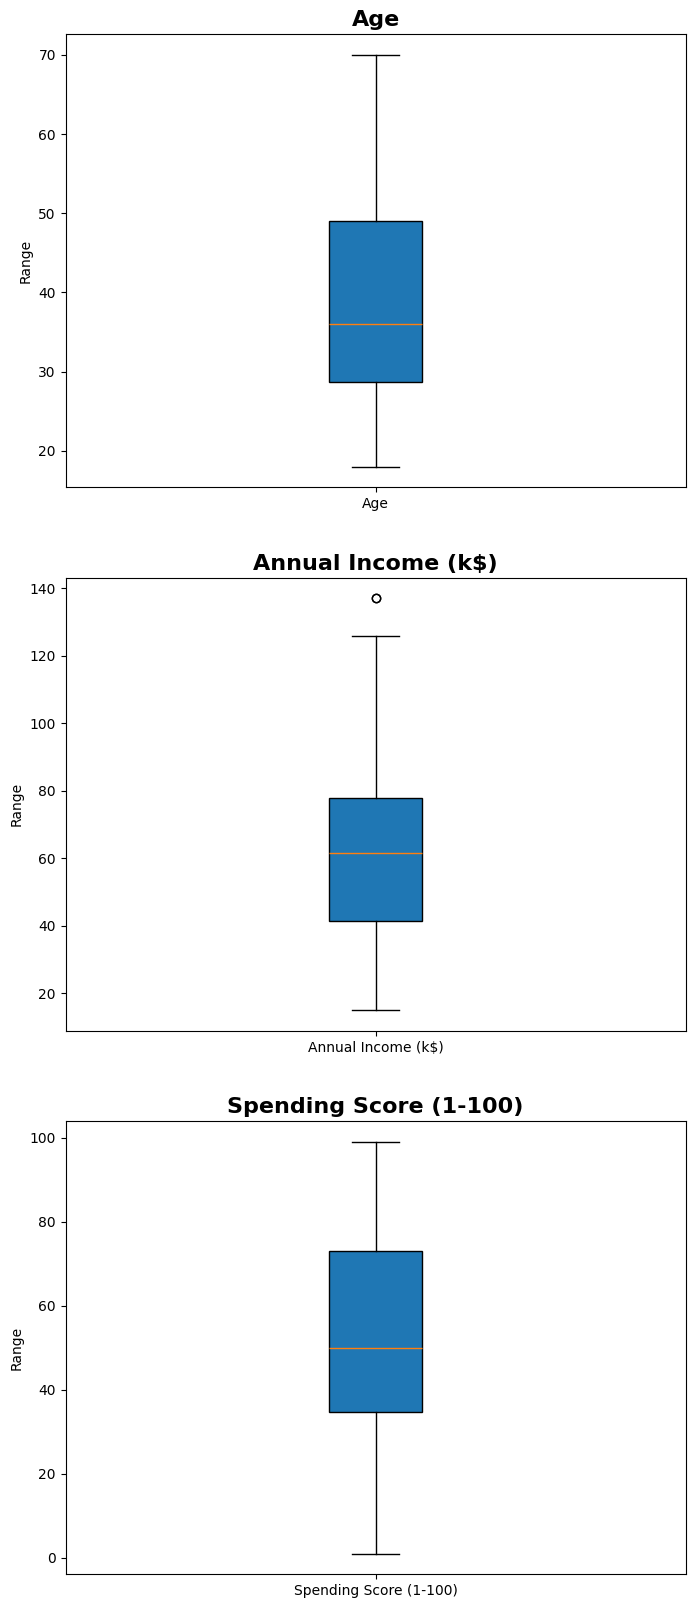

In [55]:
fig,ax = plt.subplots(3,1,figsize=(8,20))
for i,col in enumerate(df.columns[1:].to_list()):
    ax[i].boxplot(x=df[col],patch_artist=True)
    ax[i].set_ylabel('Range')
    ax[i].set_title(col,weight='bold',fontsize=16)
    ax[i].set_xticks(ticks=[1],labels=[col])
    ax[i].get_tightbbox()

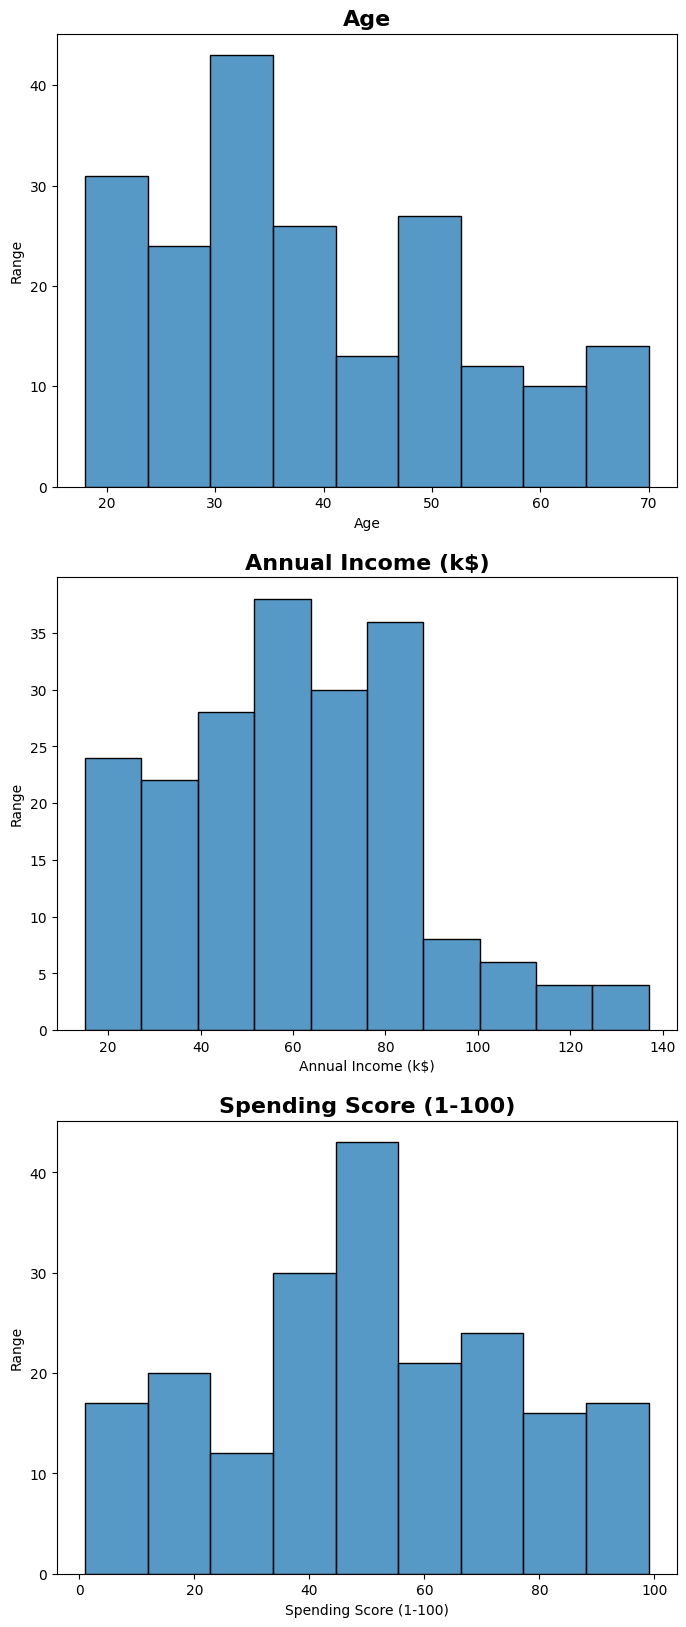

In [59]:
fig,ax = plt.subplots(3,1,figsize=(8,20))
for i,col in enumerate(df.columns[1:].to_list()):
    sns.histplot(x=df[col],ax=ax[i])
    ax[i].set_ylabel('Range')
    ax[i].set_title(col,weight='bold',fontsize=16)
    ax[i].get_tightbbox()

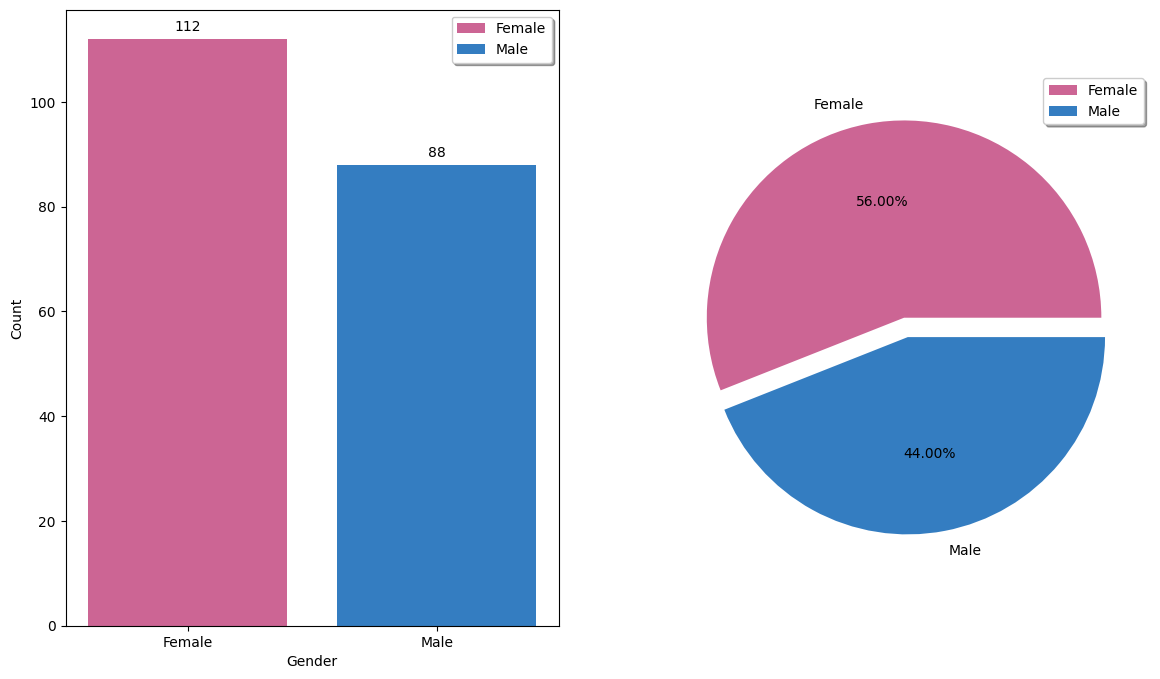

In [86]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
ax = plt.bar(x=df.Gender.value_counts().index,height=df.Gender.value_counts().values,color=['#CC6594','#347DC1'],label=['Female','Male'])
for p in ax.patches:
    plt.annotate(p.get_height(),(p.get_x()+0.4,p.get_height()+1),ha='center',va='bottom')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(shadow=True)
plt.subplot(1,2,2)
plt.pie(df.Gender.value_counts().values,colors=['#CC6594','#347DC1'],labels=['Female','Male'],autopct='%.2f%%',explode=[0,0.1])
plt.legend(shadow=True)
plt.show()

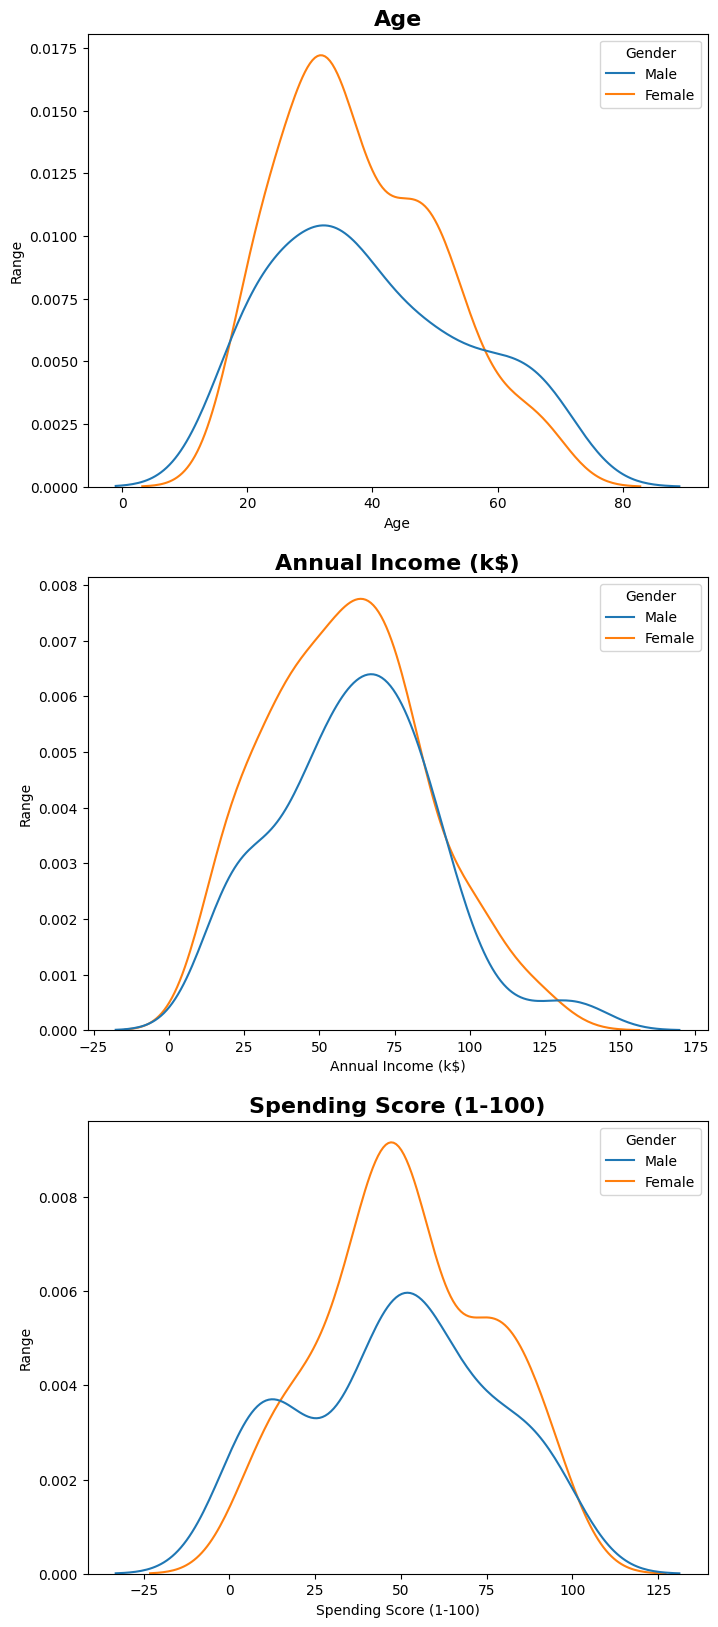

In [88]:
f,ax = plt.subplots(3,1,figsize=(8,20))
for i,col in enumerate(df.columns[1:].to_list()):
    sns.kdeplot(data=df,x=col,hue='Gender',ax=ax[i])
    ax[i].set_ylabel('Range')
    ax[i].set_title(col,weight='bold',fontsize=16)
    ax[i].get_tightbbox()

<Figure size 800x600 with 0 Axes>

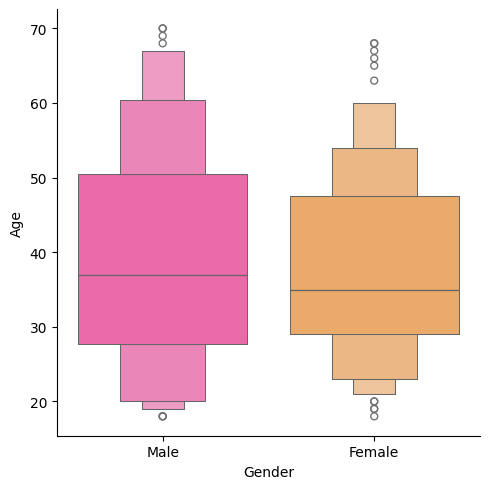

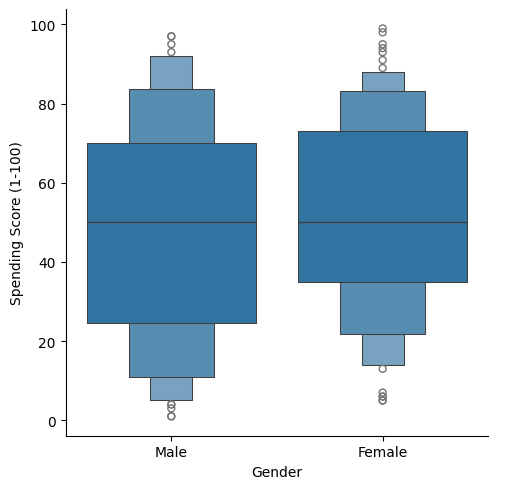

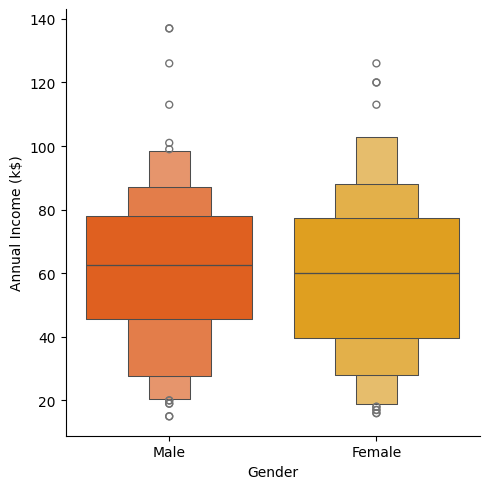

In [101]:
plt.figure(figsize=(8,6))
sns.catplot(data=df,x='Gender',y='Age',kind='boxen',palette='spring')
sns.catplot(data=df,x='Gender',y='Spending Score (1-100)',kind='boxen')
sns.catplot(data=df,x='Gender',y='Annual Income (k$)',kind='boxen',palette='autumn')

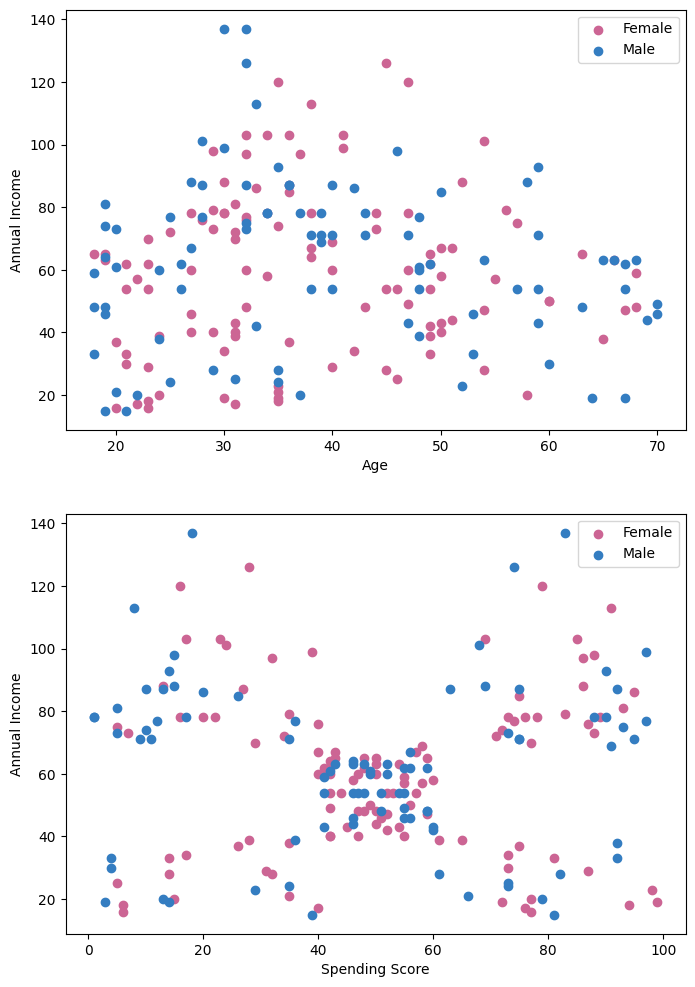

In [114]:
plt.figure(figsize=(8,12))
plt.subplot(2,1,1)
c = ['#CC6594','#347DC1']
for i,gender in enumerate(['Female','Male']): 
    plt.scatter(x='Age',y='Annual Income (k$)',data=df[df.Gender == gender],c=c[i])
    plt.xlabel('Age')
    plt.ylabel('Annual Income')
    plt.legend(labels=['Female','Male'])
plt.subplot(2,1,2)
for i,gender in enumerate(['Female','Male']): 
    plt.scatter(x='Spending Score (1-100)',y='Annual Income (k$)',data=df[df.Gender == gender],c=c[i])
    plt.xlabel('Spending Score')
    plt.ylabel('Annual Income')
    plt.legend(labels=['Female','Male'])
plt.show()

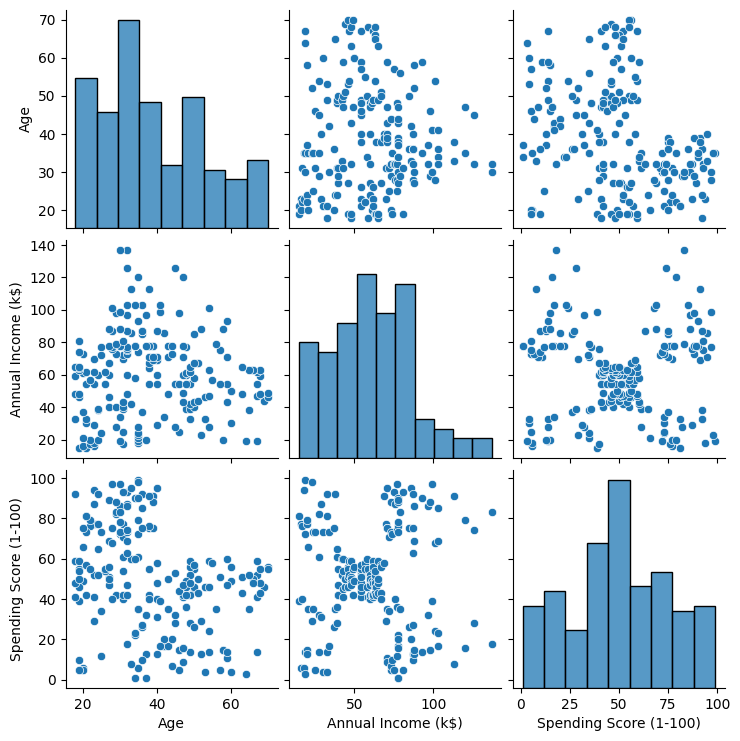

In [115]:
sns.pairplot(data=df)

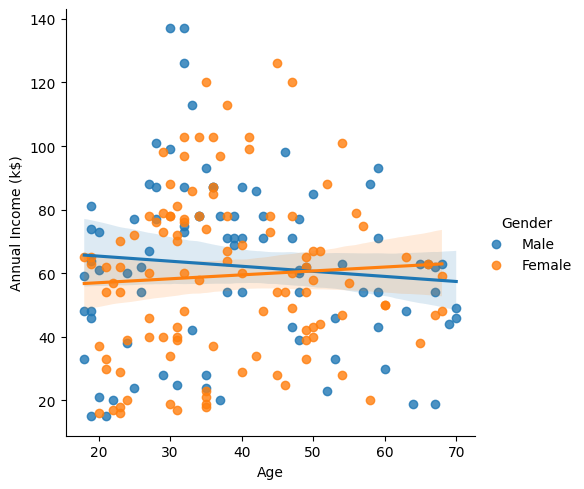

In [117]:
sns.lmplot(data=df,x='Age',y='Annual Income (k$)',hue='Gender')

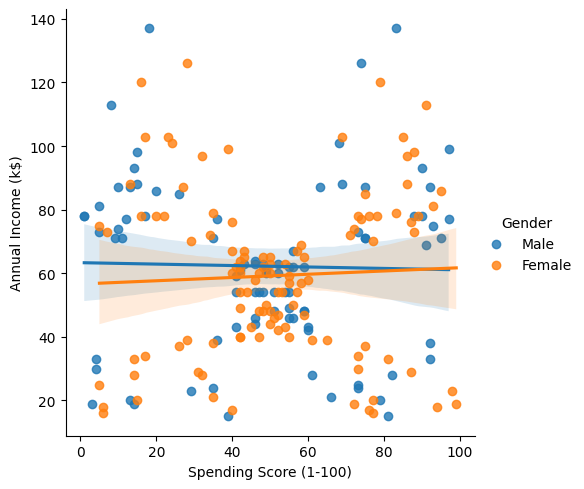

In [119]:
sns.lmplot(data=df,x='Spending Score (1-100)',y='Annual Income (k$)',hue='Gender')

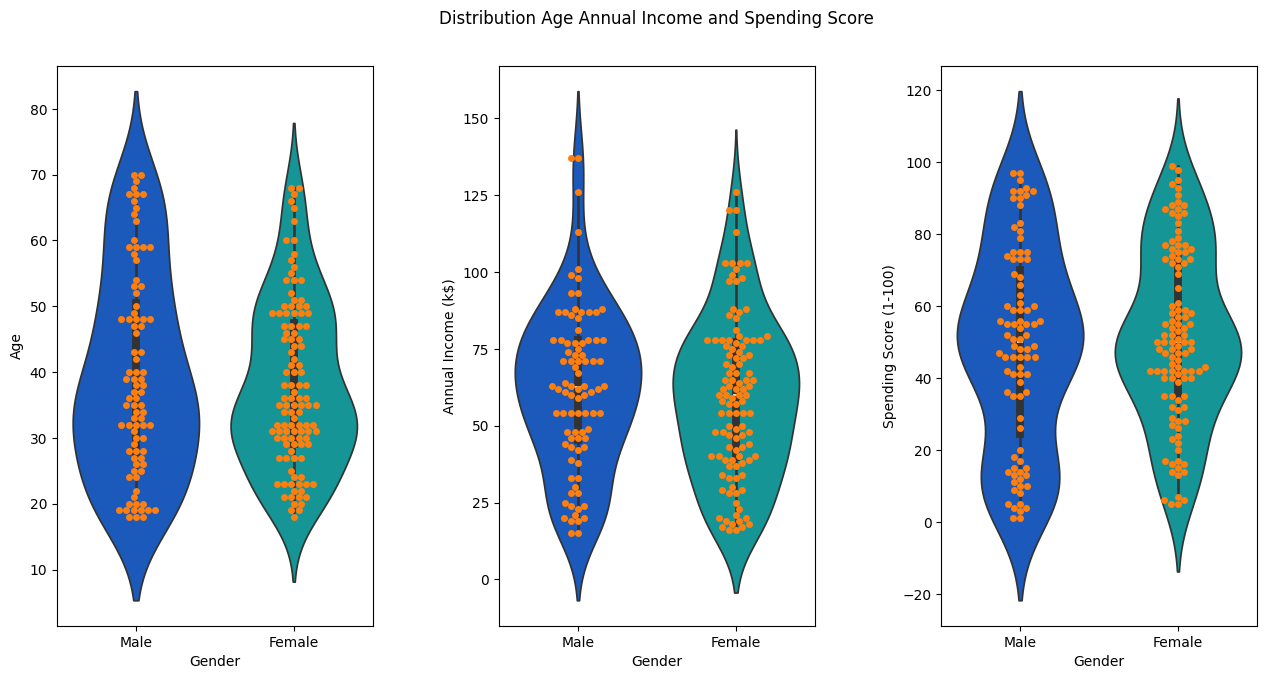

In [129]:
plt.figure(1,figsize=(15,7))
n=0 
for col in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1,3,n)
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    sns.violinplot(x='Gender',y = col , data = df , palette = 'winter')
    sns.swarmplot(x = 'Gender' , y = col , data = df)
plt.suptitle('Distribution Age Annual Income and Spending Score')
plt.show()

In [237]:
x = df

In [238]:
x.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [239]:
ohe = OneHotEncoder(sparse_output=False)

In [240]:
gen = ohe.fit_transform(x[['Gender']])
gen = pd.DataFrame(gen).astype(int)

In [241]:
ohe.get_feature_names_out()

array(['Gender_Female', 'Gender_Male'], dtype=object)

In [242]:
x.reset_index(drop=True,inplace=True)

In [243]:
x['Gender_Bin'] = gen[0]

In [244]:
x

,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_Bin
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,1
197,Male,32,126,74,0
198,Male,32,137,18,0


In [245]:
x.drop('Gender',axis=1,inplace=True)

In [246]:
wcss = []
for i in range(1,12):
    km = KMeans(n_clusters=i,init='k-means++')
    km.fit(x)
    wcss.append(km.inertia_)

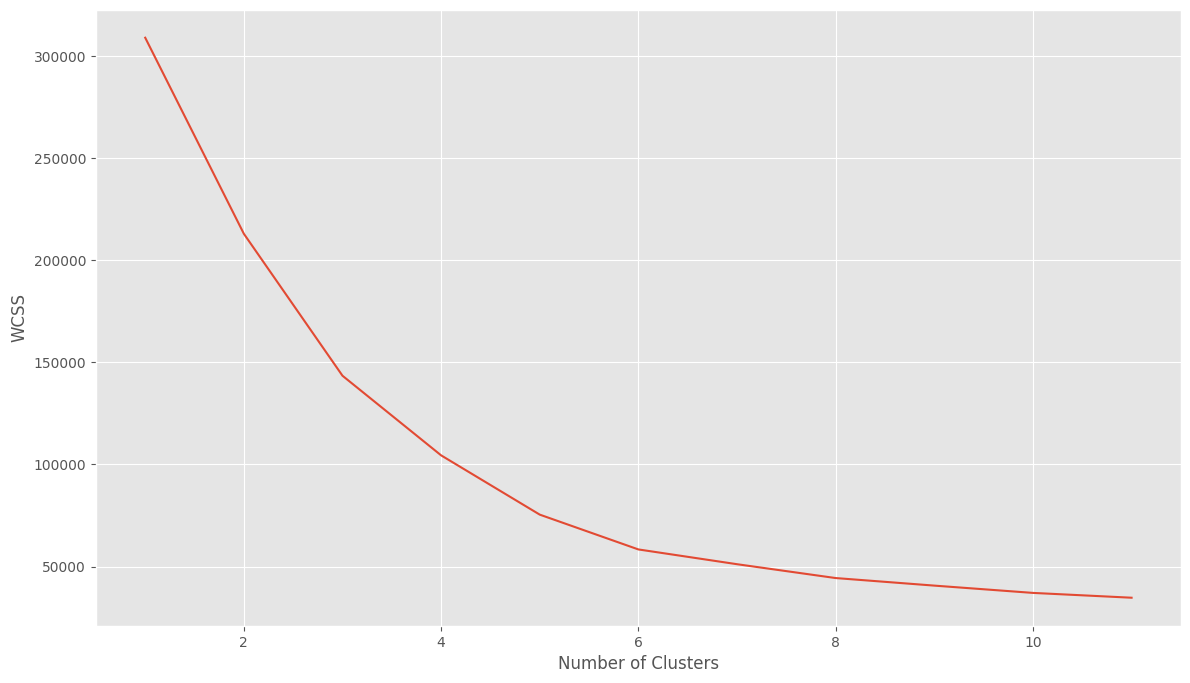

In [253]:
plt.figure(figsize=(14,8))
with plt.style.context('ggplot'):
    plt.plot(np.arange(1,12),wcss)
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

In [248]:
km = KMeans(n_clusters=5,init='k-means++')
y = km.fit_predict(x)

In [249]:
df['Target'] = y

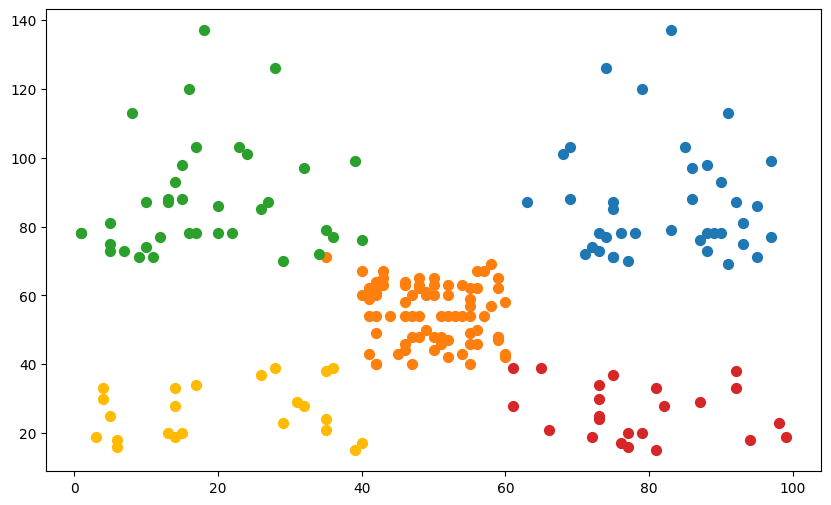

In [252]:
c = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#ffbb00']
plt.figure(figsize=(10,6))
plt.subplot(1,1,1)
for i,x in enumerate(np.unique(y)):
    plt.scatter(x=df[df['Target'] == x]['Spending Score (1-100)'],y=df[df['Target'] == x]['Annual Income (k$)'],s=50,c=c[i],)
plt.show()

In [257]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('Target',axis=1),df['Target'],test_size=0.2)

In [258]:
len(x_train)

160

In [260]:
len(x_test)

40

In [262]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [263]:
knn.score(x_train,y_train)

0.9875

In [264]:
knn.score(x_test,y_test)

1.0